- 와인 데이터 품질 분류하기

In [11]:
import pandas as pd
from sklearn.datasets import load_wine

wine = load_wine()

X = wine['data']
feature_names = wine['feature_names']

y = wine['target']
df = pd.DataFrame(X, columns = feature_names)
df


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


- 가져온 데이터를 살펴보자!

In [12]:
print(wine['target_names'])
print(y)
print(y.shape)

['class_0' 'class_1' 'class_2']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
(178,)


- 그래프를 이용해 직관적으로 알아보자.

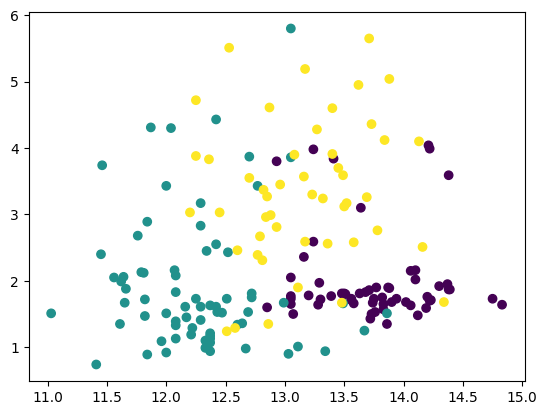

In [13]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots()
ax.scatter(df['alcohol'],df['malic_acid'],c=y)

array([[<Axes: xlabel='alcohol', ylabel='alcohol'>,
        <Axes: xlabel='malic_acid', ylabel='alcohol'>,
        <Axes: xlabel='ash', ylabel='alcohol'>,
        <Axes: xlabel='alcalinity_of_ash', ylabel='alcohol'>,
        <Axes: xlabel='magnesium', ylabel='alcohol'>,
        <Axes: xlabel='total_phenols', ylabel='alcohol'>,
        <Axes: xlabel='flavanoids', ylabel='alcohol'>,
        <Axes: xlabel='nonflavanoid_phenols', ylabel='alcohol'>,
        <Axes: xlabel='proanthocyanins', ylabel='alcohol'>,
        <Axes: xlabel='color_intensity', ylabel='alcohol'>,
        <Axes: xlabel='hue', ylabel='alcohol'>,
        <Axes: xlabel='od280/od315_of_diluted_wines', ylabel='alcohol'>,
        <Axes: xlabel='proline', ylabel='alcohol'>],
       [<Axes: xlabel='alcohol', ylabel='malic_acid'>,
        <Axes: xlabel='malic_acid', ylabel='malic_acid'>,
        <Axes: xlabel='ash', ylabel='malic_acid'>,
        <Axes: xlabel='alcalinity_of_ash', ylabel='malic_acid'>,
        <Axes: xlabel='magne

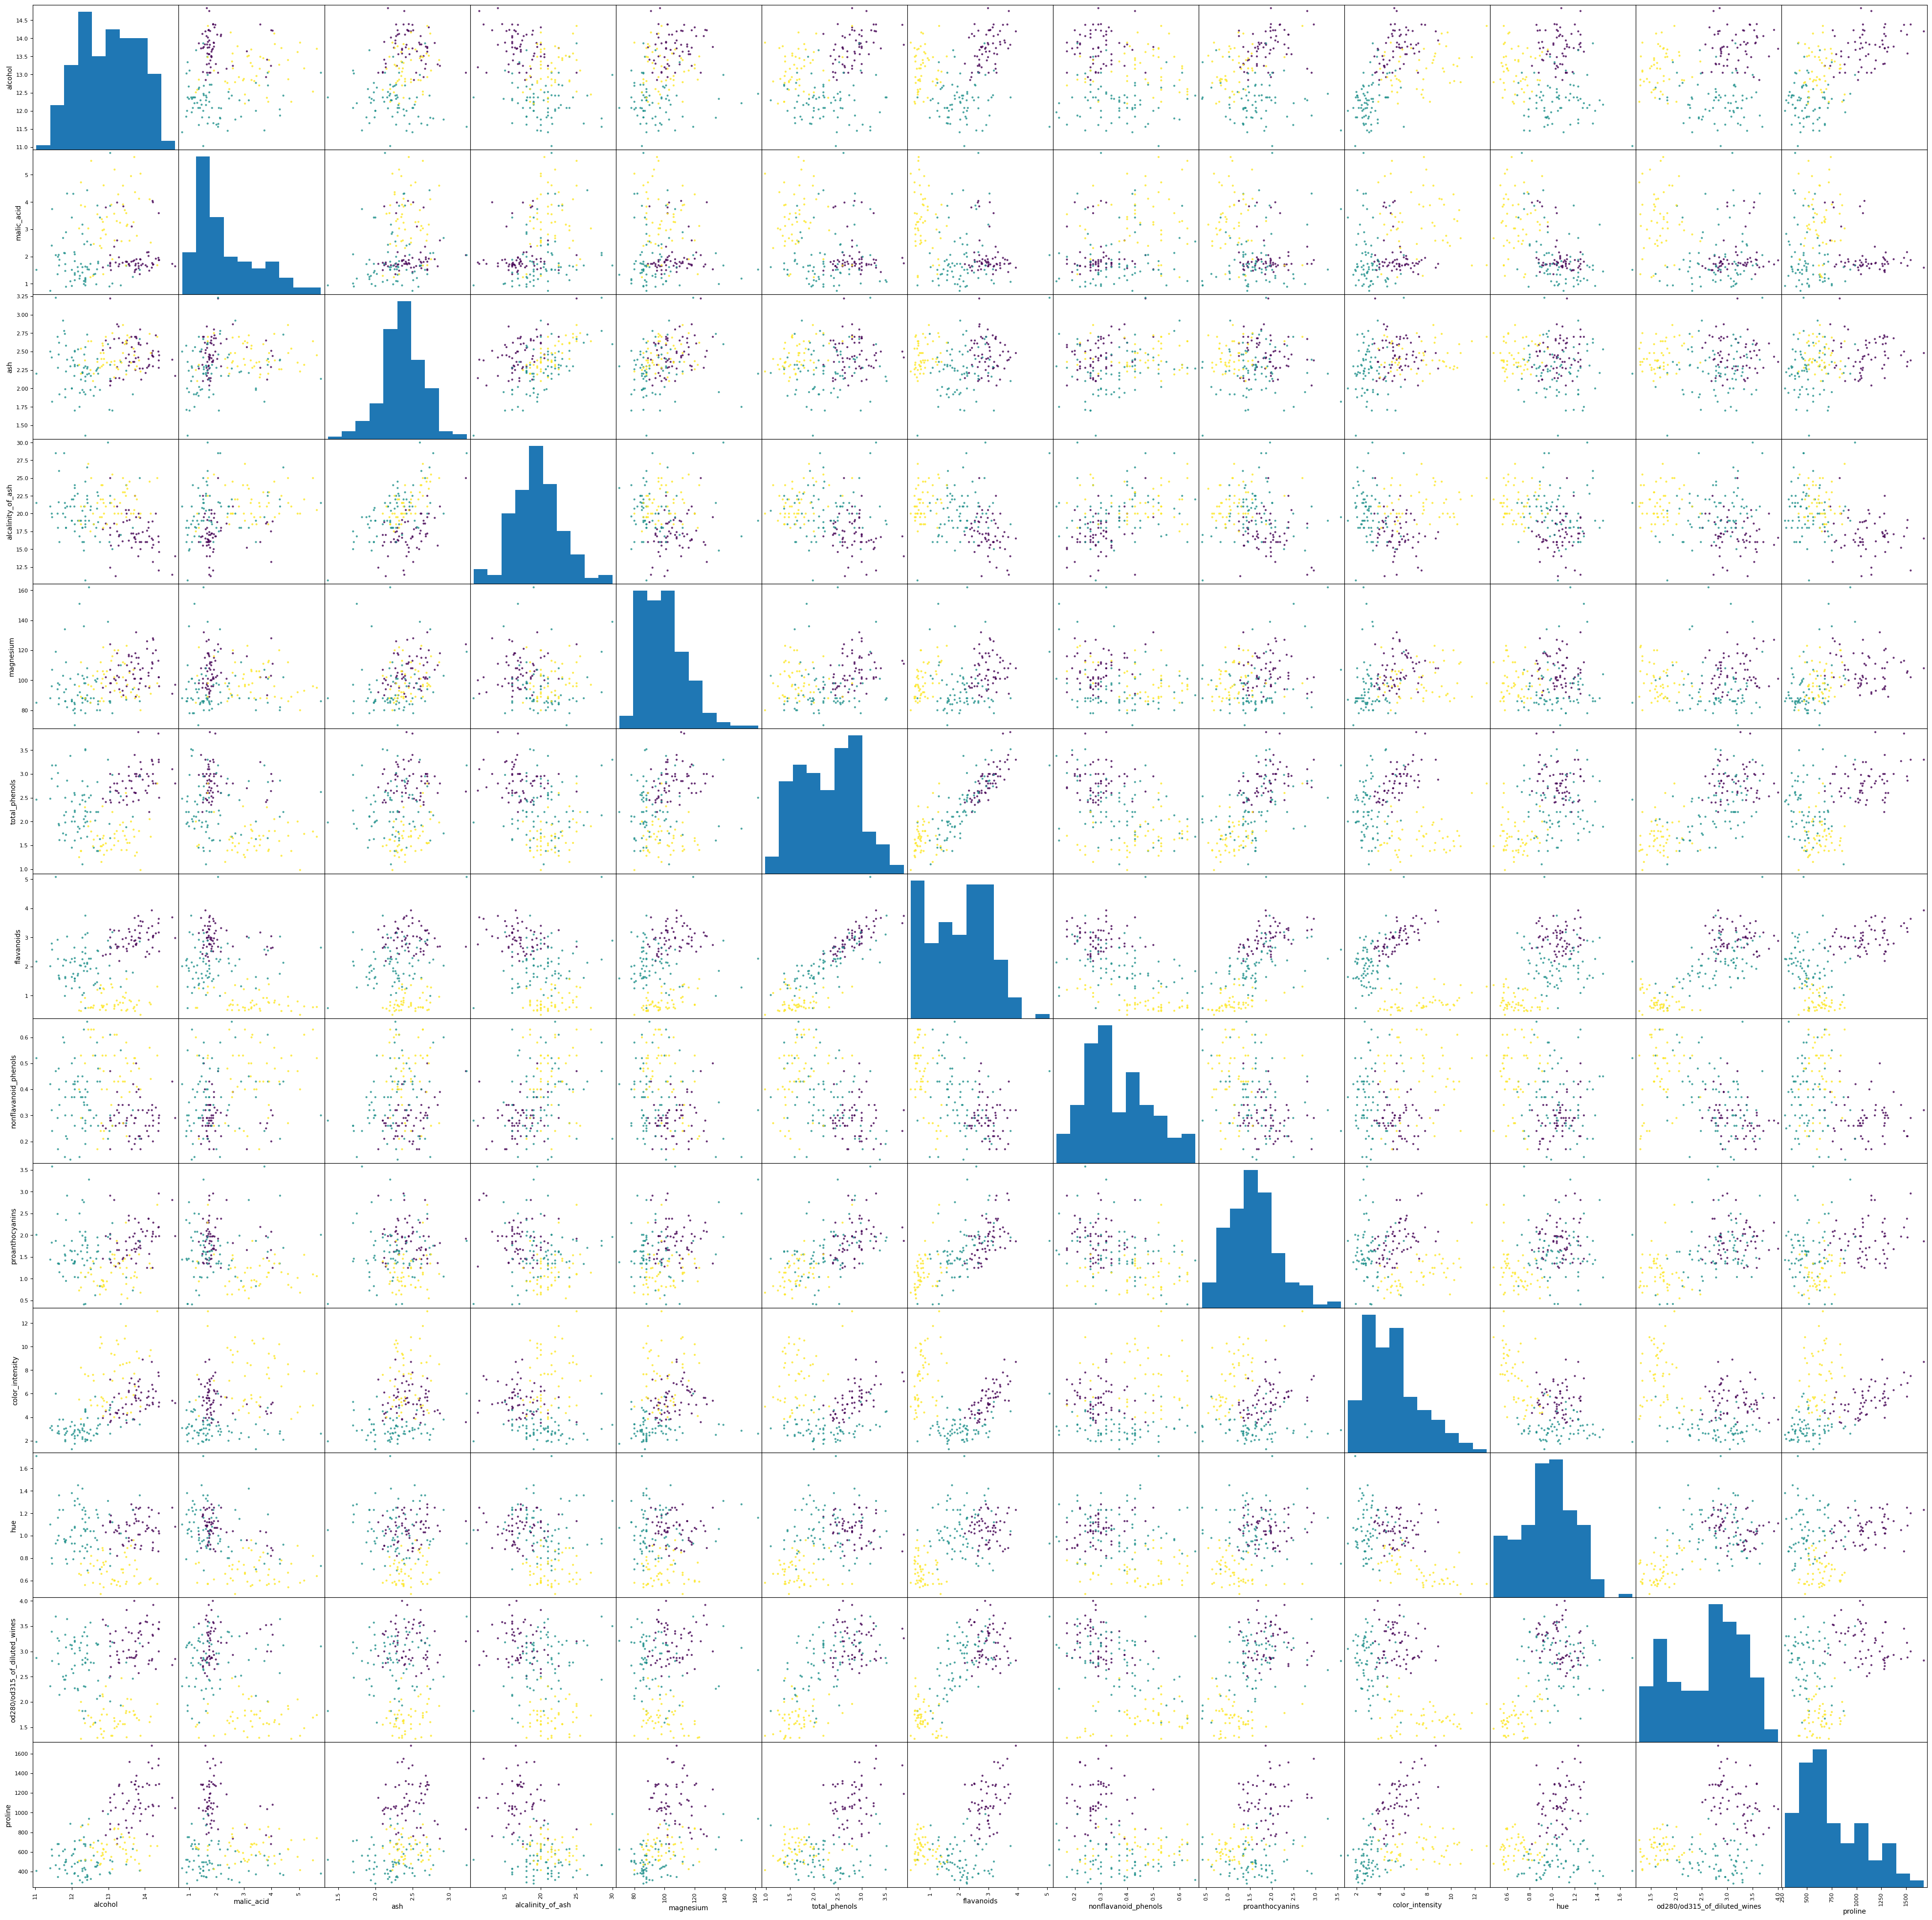

In [16]:
pd.plotting.scatter_matrix(df,c=y,figsize=(50,50),alpha=0.8)
#sns.pairplot으로도 그릴수 있음.

- Train_test_Split

- staratify : target 데이터(Y)의 분포 비율을 고려해서 적절히 train, test set 데이터를 만듭니다. 분류모델에서만 사용하는 것을 추천합니다.
- random_state : '777'이라는 고정된 랜덤시드를 사용합니다. 데이터셋을 나눌 때마다 데이터셋이 서로 다르게 만들어지는 것을 막습니다. 모델학습, 실험을 여러번 진행할 때, 데이터셋으로 인한 랜덤요소를 제거하고 각 모델 간 성능을 비교할 수 있습니다.

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=777)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(133, 13) (45, 13)
(133,) (45,)


- 평균이 너무 다름. -> 변수들끼리 비교 대상이 될 수 없음

nonflavanoid_phenols의 평균은 0.3인데 proline의 평균은 746입니다.
칼럼마다 scale이 매우 다르다는 것인데, 이 경우 Y를 분류하는데에 미치는 영향 정도가 달라지게 됩니다.
보다 원활한 학습의 진행을 위해서는 정규화를 진행할 필요가 있습니다.
분야에 따라 서로 각기다른 정규화를 사용하기도 하고, 새로운 방식을 만들어내기도 합니다.

sklearn.preprocessing에서 제공하는 대표적인 정규화 scaler는 다음과 같습니다.

- StandardScaler : (평균=0, 분산=1)이 되도록 조정합니다.
- MinMaxScaler : 모든 값이 0~1 사이에 오도록(최대값=1, 최소값=0) 조정합니다.
- RobustScaler : 최대, 최솟값 대신 사분위값(Q1, Q2, Q3)를 사용해 조정합니다. (이상값에 덜 민감함)

여기서는 MinMaxScaler를 사용하겠습니다.

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)
#X_scaled_train = scaler.fit_tranfrom(X_train) 와 차이가 있음.

pd.DataFrame(X_scaled_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
mean,0.512268,0.301847,0.568601,0.445129,0.329683,0.446098,0.483915,0.464478,0.378762,0.319472,0.386491,0.486188,0.378229
std,0.206279,0.238522,0.214119,0.170097,0.164545,0.213477,0.285922,0.251911,0.179163,0.194846,0.190692,0.257047,0.248423
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.342105,0.134904,0.435897,0.335106,0.195652,0.262069,0.219941,0.265306,0.274448,0.168089,0.243902,0.238095,0.173061
50%,0.531579,0.190578,0.564103,0.420213,0.304348,0.431034,0.519062,0.408163,0.362776,0.283276,0.398374,0.553114,0.318367
75%,0.684211,0.468951,0.735043,0.547872,0.434783,0.627586,0.744868,0.632653,0.485804,0.424061,0.512195,0.695971,0.567347
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- X_train 데이터셋을 기준으로 scaler를 설정한 뒤, X_train 데이터를 정규화 한 데이터 X_scaled_train 데이터셋을 생성했습니다.
모든 칼럼에서 (max=1, min=0)이 되었습니다.

- X_train에 적용하였다면, X_test에도 적용을 해야함.

In [19]:
X_scaled_test = scaler.transform(X_test)
pd.DataFrame(X_scaled_test).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,0.537251,0.256721,0.572840,0.429669,0.304348,0.475326,0.529293,0.418141,0.354083,0.330906,0.393135,0.507041,0.357442
std,0.235528,0.240762,0.289175,0.199885,0.123433,0.223575,0.313578,0.259776,0.185411,0.208333,0.172606,0.271164,0.283485
min,0.100000,-0.051392,-0.290598,-0.031915,0.086957,0.058621,0.046921,-0.020408,0.003155,0.057167,0.073171,0.007326,-0.009796
25%,0.352632,0.111349,0.435897,0.292553,0.206522,0.265517,0.258065,0.244898,0.201893,0.164676,0.252033,0.285714,0.142857
50%,0.531579,0.177730,0.564103,0.468085,0.282609,0.517241,0.548387,0.346939,0.324921,0.291809,0.373984,0.553114,0.258776
75%,0.736842,0.342612,0.700855,0.547872,0.380435,0.575862,0.686217,0.591837,0.495268,0.402730,0.520325,0.706960,0.567347
max,0.978947,1.032120,1.307692,0.920213,0.630435,0.868966,1.390029,1.061224,0.804416,0.893345,0.731707,0.934066,1.134694


In [20]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_scaled_train, y_train)

pred_train = model.predict(X_scaled_train)
model.score(X_scaled_train, y_train)

0.9849624060150376

In [21]:
pred_test = model.predict(X_scaled_test)
model.score(X_scaled_test,y_test)

1.0

- 오차 행렬 확인

In [22]:
from sklearn.metrics import confusion_matrix
print('훈련 데이터셋 오차 행렬\n', confusion_matrix(y_train,pred_train),'\n')
print('테스트 데이터셋 오차 행렬\n', confusion_matrix(y_test,pred_test))

훈련 데이터셋 오차 행렬
 [[44  0  0]
 [ 1 51  1]
 [ 0  0 36]] 

테스트 데이터셋 오차 행렬
 [[15  0  0]
 [ 0 18  0]
 [ 0  0 12]]


- 성능결과 확인.
 - precision(정밀도),F1-score,sklearn -> classification_report를 사용하면 손쉽게 한번에 확인할 수 있음.

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        44
           1       1.00      0.96      0.98        53
           2       0.97      1.00      0.99        36

    accuracy                           0.98       133
   macro avg       0.98      0.99      0.99       133
weighted avg       0.99      0.98      0.98       133



In [ ]:
# 타이타닉 테이터

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font',size = 14)
import seaborn as sns
sns.set(style = 'white') # white background style for seaborn plots
sns.set(style = 'whitegrid',color_codes=True)

import warnings
warnings.simplefilter(action='ignore')



In [29]:
train_df = pd.read_csv('D:/류영표강사20230501/titanic/train.csv')
test_df = pd.read_csv('D:/류영표강사20230501/titanic/test.csv')



In [31]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
print(len(train_df),len(test_df))

891 418


In [33]:
#결측치 확인
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [34]:
#결측치 비율(Age)
print('Percent of missing "Age" records is %.2f%%' %((train_df['Age'].isnull().sum()/
                                                      train_df.shape[0])*100))

Percent of missing "Age" records is 19.87%


- age에 대한 그림

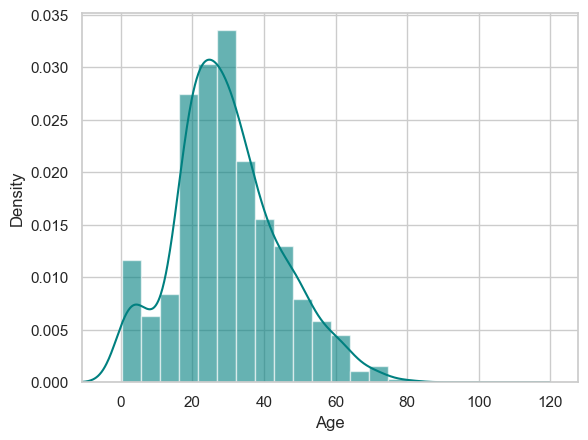

In [35]:
ax = train_df['Age'].hist(bins=15, density=True, stacked=True, color='teal',alpha=0.6)
train_df['Age'].plot(kind = 'density',color='teal')
ax.set(xlabel='Age')
plt.xlim(-10.85)
plt.show()

In [36]:
# mean
print('The mean of"Age"is%.2f' %(train_df['Age'].mean(skipna=True)))
# median
print('The median of"Age"is%.2f' %(train_df['Age'].median(skipna=True)))
# mode
print('The mode of"Age"is%.2f' %(train_df['Age'].mode()))

The mean of"Age"is29.70
The median of"Age"is28.00
The mode of"Age"is24.00


In [37]:
# 결측치 비율(Embarked)
print('Percent of missing "Embarked" records is %.2f%%' %((train_df['Embarked'].isnull().sum()/
                                                            train_df.shape[0])*100))


Percent of missing "Embarked" records is 0.22%


In [38]:
#결측치 비율(Cabin)
print('Percent of missing "Cabin" records is %.2f%%' %((train_df['Cabin'].isnull().sum()/
                                                      train_df.shape[0])*100))

Percent of missing "Cabin" records is 77.10%


Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):
Sex
male      577
female    314
Name: count, dtype: int64


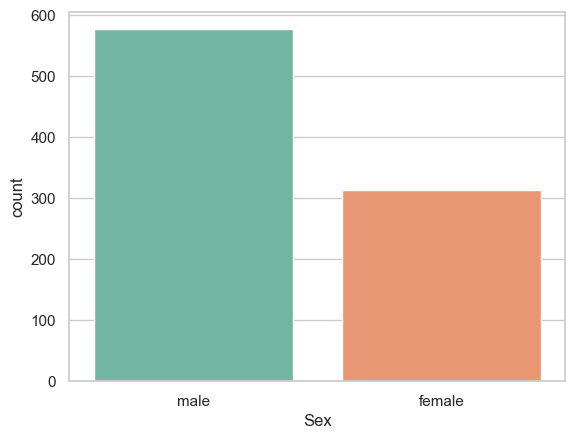

In [39]:
print('Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(train_df['Sex'].value_counts())
sns.countplot(x= 'Sex', data = train_df, palette='Set2')
plt.show()
#Embarked는 S에서 탑승이 많이 됨.

Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


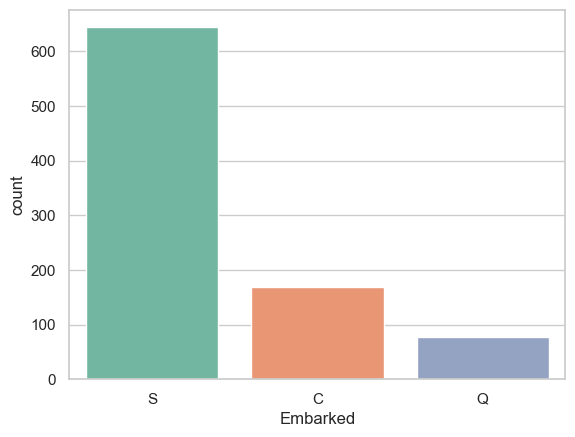

In [40]:
print('Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(train_df['Embarked'].value_counts())
sns.countplot(x= 'Embarked', data = train_df, palette='Set2')
plt.show()
#Embarked는 S에서 탑승이 많이 됨.

In [41]:
#결측치 처리 / ags는 median / Embarked는 가장 많은 것으로 채워넣음.
#cabin은 drop
train_data = train_df.copy() 
train_data['Age'].fillna(train_data['Age'].median(skipna=True), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].value_counts().idxmax(), inplace=True)
train_data.drop('Cabin',axis=1,inplace=True)

In [42]:
#결측치 처리 후 확인
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

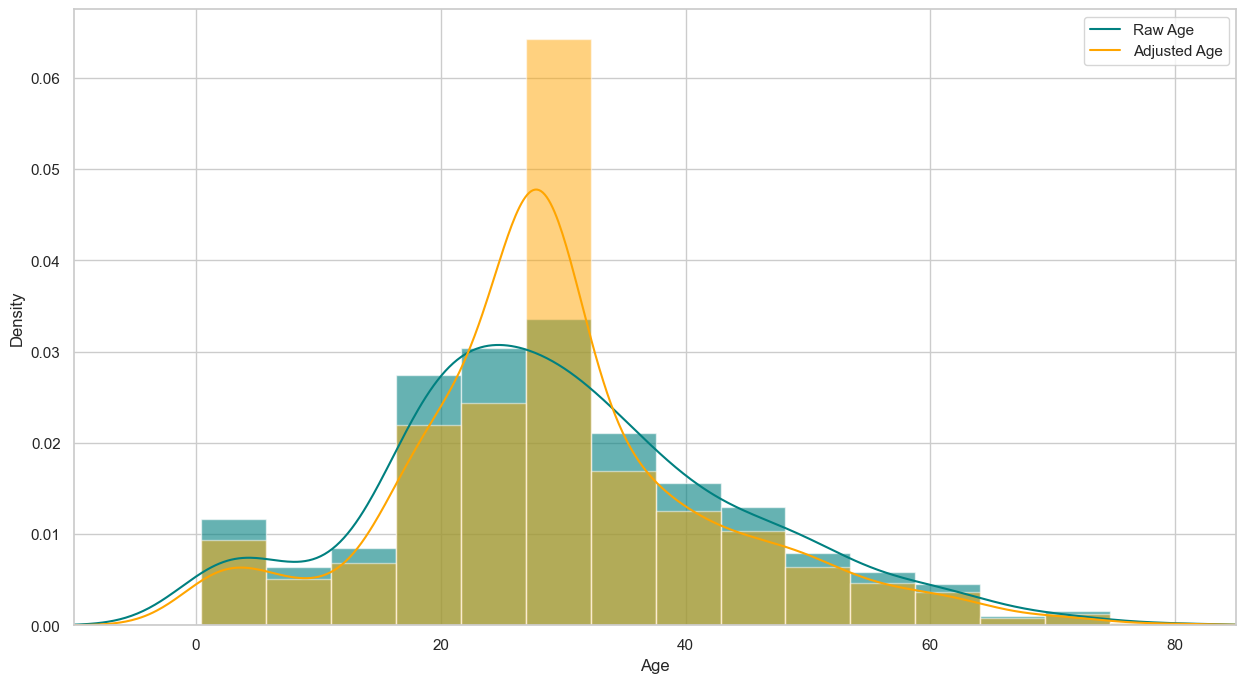

In [43]:
#결측치 처리 전과 처리 후의 figure
plt.figure(figsize=(15,8))
ax = train_df['Age'].hist(bins=15, density=True, stacked=True, color='teal',alpha=0.6)
train_df["Age"].plot(kind = 'density',color='teal')
ax = train_data['Age'].hist(bins=15, density=True, stacked=True, color='orange',alpha=0.5)
train_data["Age"].plot(kind = 'density',color='orange')
ax.legend(['Raw Age','Adjusted Age'])
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

- 파생변수
    - 새로운 변수 생성

In [44]:
train_data['TravelAlone'] = np.where((train_data['SibSp']+train_data['Parch'])>0,0,1)
train_data.drop('SibSp',axis=1,inplace=True)
train_data.drop('Parch',axis=1,inplace=True)

In [45]:
#원핫 인코딩
training = pd.get_dummies(train_data, columns = ['Pclass','Embarked','Sex'])
training.drop('PassengerId',axis=1,inplace=True)
training.drop('Name',axis=1,inplace=True)
training.drop('Ticket',axis=1,inplace=True)

final_train = training
training.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,22.0,7.2500,0,False,False,True,False,False,True,False,True
1,1,38.0,71.2833,0,True,False,False,True,False,False,True,False
2,1,26.0,7.9250,1,False,False,True,False,False,True,True,False
3,1,35.0,53.1000,0,True,False,False,False,False,True,True,False
4,0,35.0,8.0500,1,False,False,True,False,False,True,False,True


- test에도 똑같이 적용.

In [47]:
#결측치 처리 / ags는 median / Embarked는 가장 많은 것으로 채워넣음.
#cabin은 drop
test_data = test_df.copy() 
test_data['Age'].fillna(train_data['Age'].median(skipna=True), inplace=True)
test_data['Embarked'].fillna(train_data['Embarked'].value_counts().idxmax(), inplace=True)
test_data.drop('Cabin',axis=1,inplace=True)

test_data['TravelAlone'] = np.where((test_data['SibSp']+test_data['Parch'])>0,0,1)
test_data.drop('SibSp',axis=1,inplace=True)
test_data.drop('Parch',axis=1,inplace=True)

#원핫 인코딩
testing = pd.get_dummies(train_data, columns = ['Pclass','Embarked','Sex'])
testing.drop('PassengerId',axis=1,inplace=True)
testing.drop('Name',axis=1,inplace=True)
testing.drop('Ticket',axis=1,inplace=True)

final_test = training
testing.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,22.0,7.2500,0,False,False,True,False,False,True,False,True
1,1,38.0,71.2833,0,True,False,False,True,False,False,True,False
2,1,26.0,7.9250,1,False,False,True,False,False,True,True,False
3,1,35.0,53.1000,0,True,False,False,False,False,True,True,False
4,0,35.0,8.0500,1,False,False,True,False,False,True,False,True


- Exploratory Data Analysis

In [48]:
final_train.columns

Index(['Survived', 'Age', 'Fare', 'TravelAlone', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_female',
       'Sex_male'],
      dtype='object')

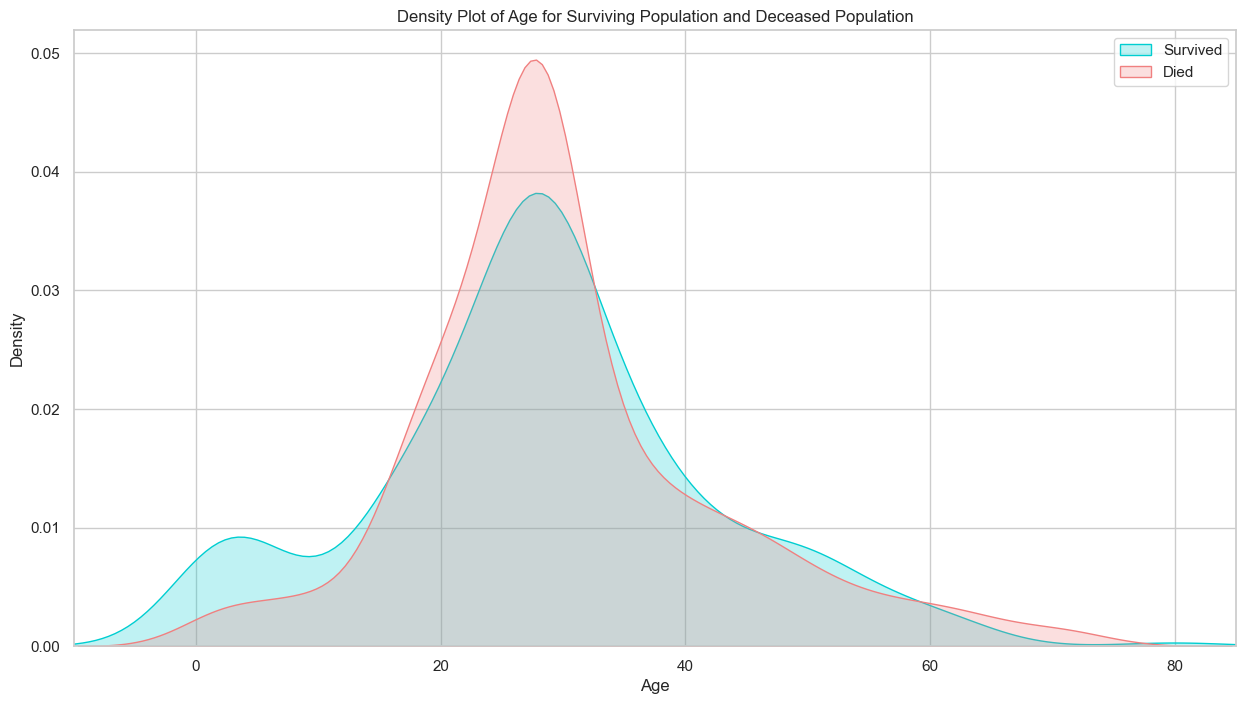

In [49]:
#Exploration of Age
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train["Age"][final_train.Survived == 1], 
                 color="darkturquoise", shade=True)
sns.kdeplot(final_train["Age"][final_train.Survived == 0], 
            color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

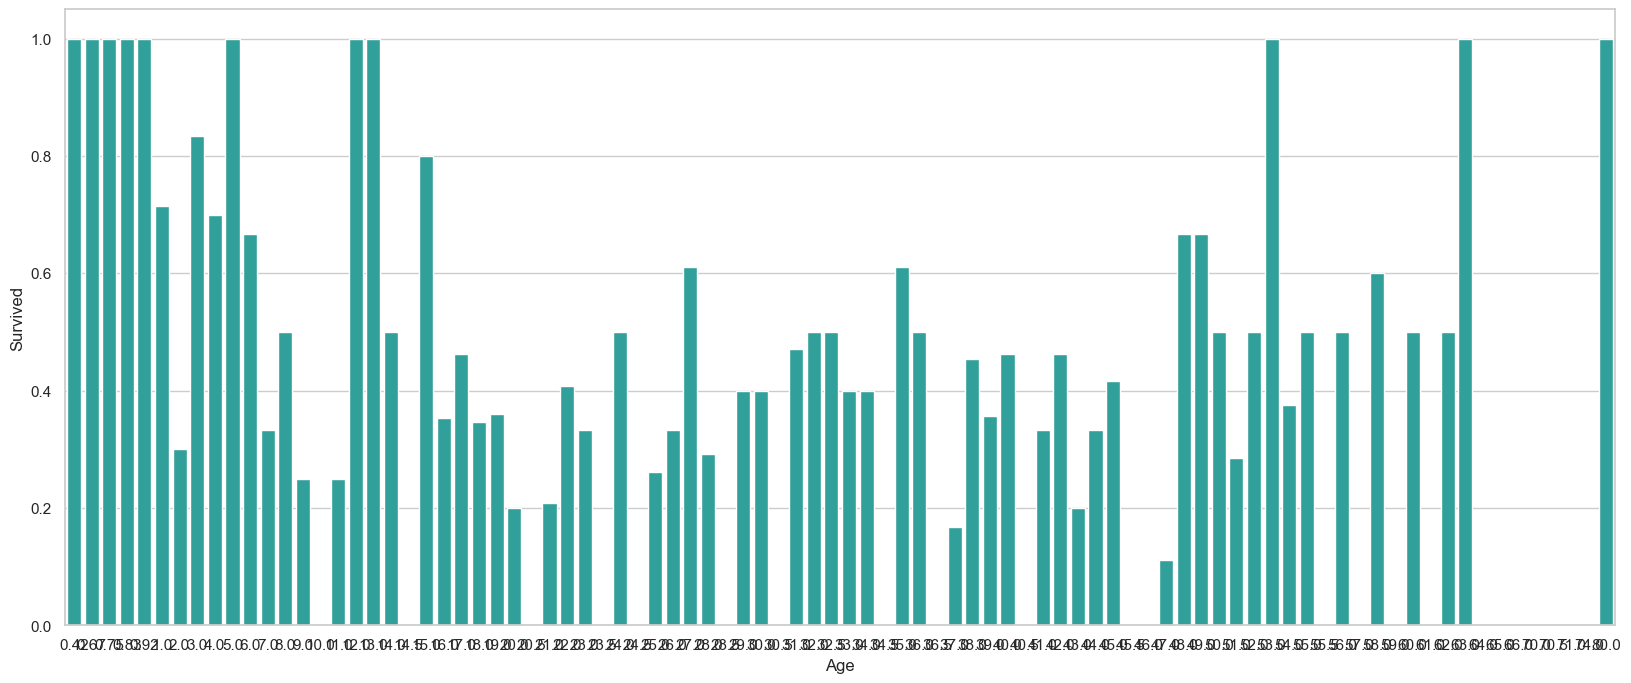

In [50]:
#age,Survived -> bar plot
plt.figure(figsize = (20,8))
avg_survival_byage = final_train[['Age','Survived']].groupby(["Age"]
                                                             ,as_index=False).mean()
g = sns.barplot(x='Age',y='Survived',data =avg_survival_byage,
                color = 'LightSeaGreen')
plt.show()
                        

In [51]:
# ISminor
final_train['ISMinor'] = np.where(final_train['Age']<=16,1,0)
final_test['ISMinor'] = np.where(final_test['Age']<=16,1,0)

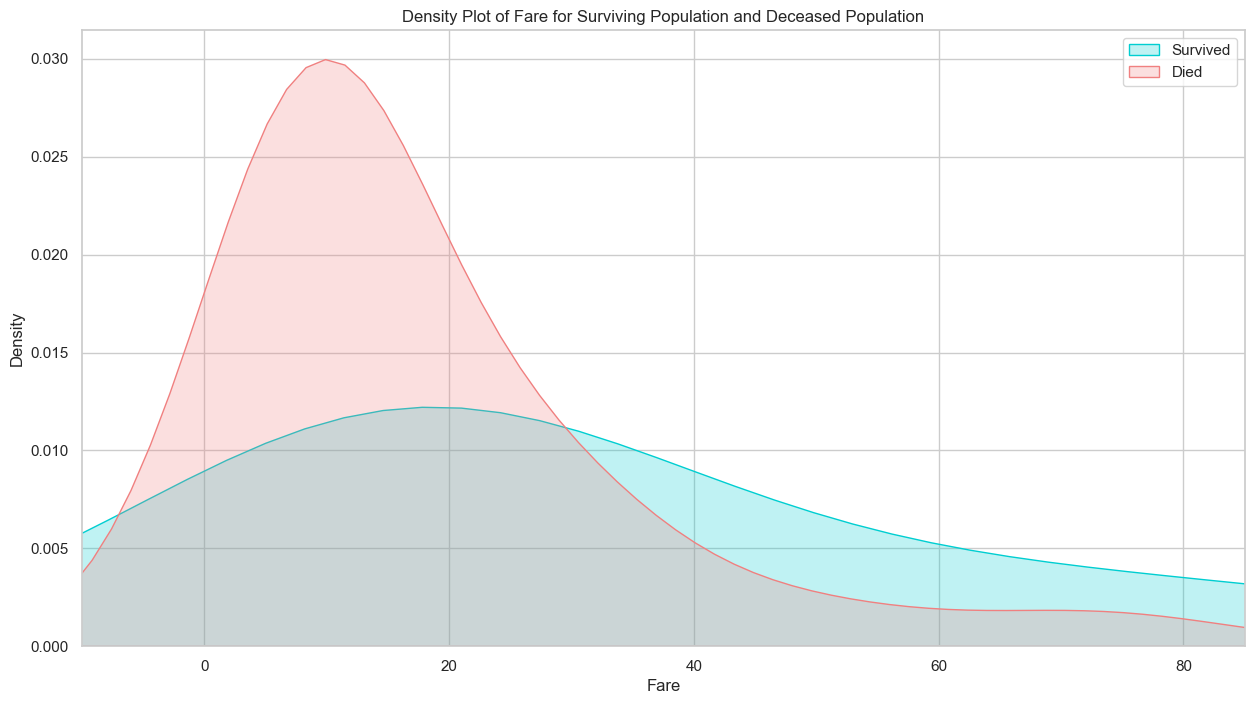

In [52]:
#Exploration of Fare
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train["Fare"][final_train.Survived == 1], 
                 color="darkturquoise", shade=True)
sns.kdeplot(final_train["Fare"][final_train.Survived == 0], 
            color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-10,85)
plt.show()

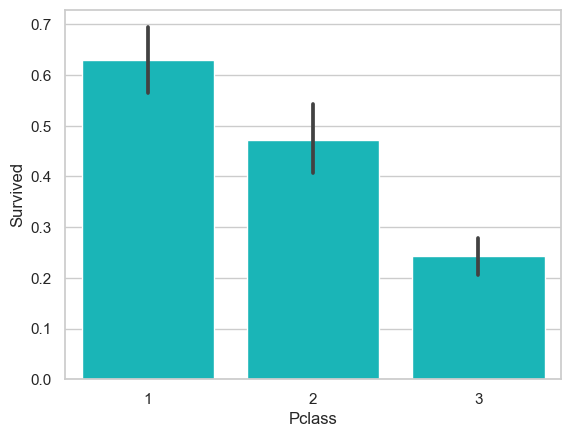

In [53]:
#Exploration of Passenger Class
sns.barplot(data = train_df,x='Pclass',y='Survived',color="darkturquoise")
plt.show()
# 1등급 승객이 안전하였음.

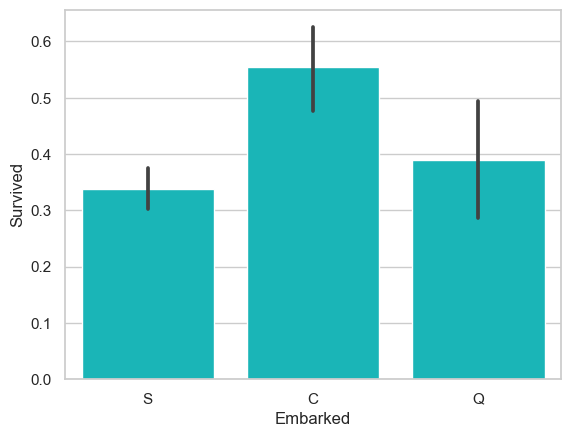

In [54]:
#Exploration of Embarked Port
sns.barplot(data = train_df,x='Embarked',y='Survived',color="darkturquoise")
plt.show()
# c위치에서 탑승을 제ㅔ일 많이 함.

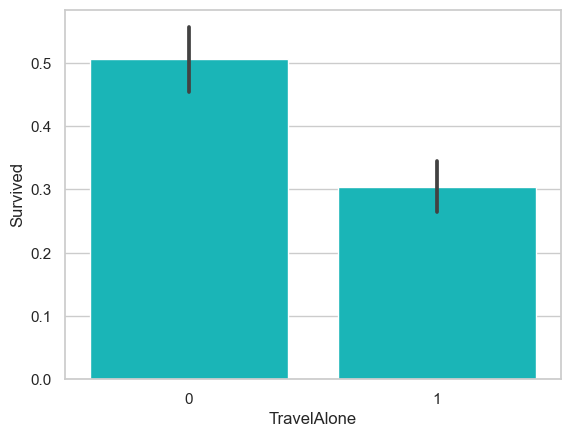

In [55]:
#Exploration of Traveling Alone VS With Family
sns.barplot(data =  final_train,x='TravelAlone',y='Survived',color="darkturquoise")
plt.show()
# 혼자이면 사망을 많이 함.

- Logistic Reregression()

- Feature Selection

- Recusive feature elmination(RFE)
    - 뒤에서부터 상관관계가 높지 않으면 feature 삭제

출처 : http://scikit-learn.org/stable/modules/feature_selection.html

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

cols = ['Age','Fare',"TravelAlone","Pclass_1","Pclass_2",
       "Embarked_C","Embarked_S","ISMinor"] 
X = final_train[cols]
y = final_train['Survived']

model= LogisticRegression()

rfe = RFE(model,n_features_to_select=5) #feature Ranking
rfe = rfe.fit(X,y)
print('Selected features: %s' %list(X.columns[rfe.support_]))

Selected features: ['TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_S', 'ISMinor']


In [58]:
final_train.columns

Index(['Survived', 'Age', 'Fare', 'TravelAlone', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_female',
       'Sex_male', 'ISMinor'],
      dtype='object')

Optimal number of features: 7
Selected features: ['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'ISMinor']


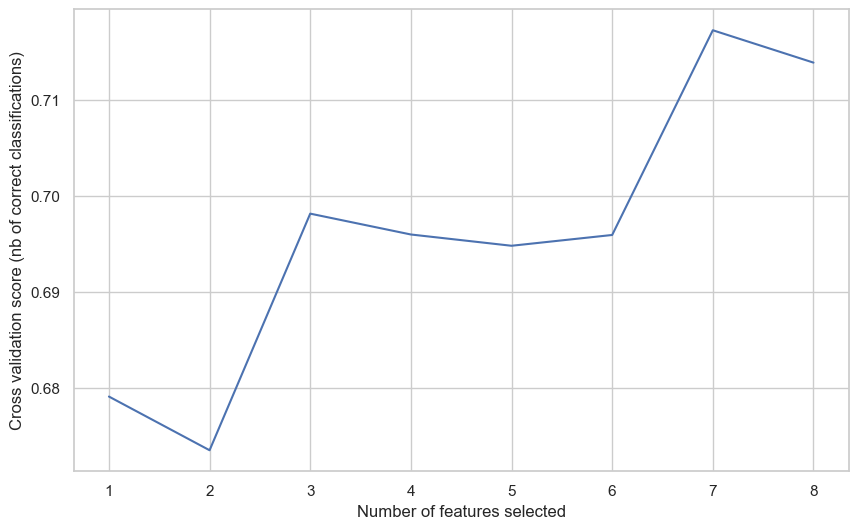

In [59]:
# RFE+CV
from sklearn.feature_selection import RFECV
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.cv_results_["mean_test_score"]) + 1), rfecv.cv_results_["mean_test_score"])
plt.show()

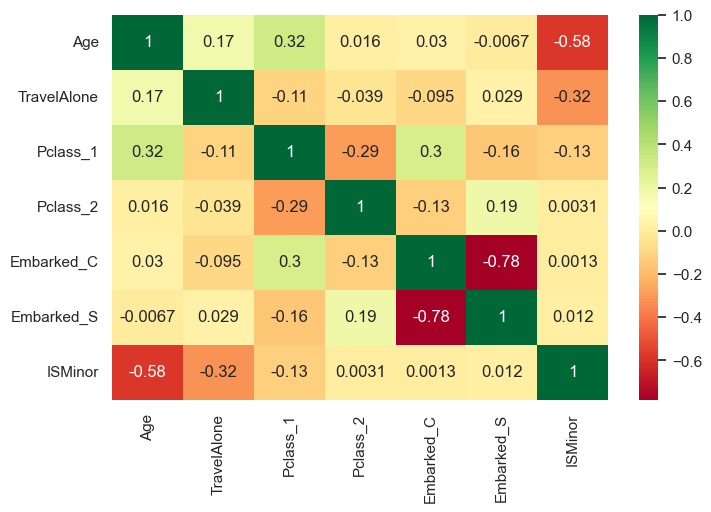

In [60]:
Selected_features = ['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 
                     'Embarked_S','ISMinor']
X = final_train[Selected_features]

plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

-  Model evaluation based on simple train/test split using train_test_split() function

Train/Test split results:
LogisticRegression accuracy is 0.709
LogisticRegression log_loss is 0.599
LogisticRegression auc is 0.758


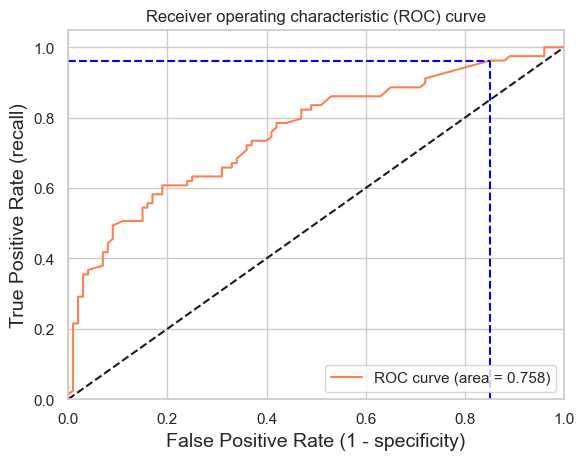

Using a threshold of 0.145 guarantees a sensitivity of 0.962 and a specificity of 0.150, i.e. a false positive rate of 85.00%.


In [61]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# create X (features) and y (response)
X = final_train[Selected_features]
y = final_train['Survived']

# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

- Model evaluation based on K-fold cross-validation using cross_val_score() function

In [62]:
# 10-fold cross-validation logistic regression
logreg = LogisticRegression()
# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the data
# cv=10 for 10 folds
# scoring = {'accuracy', 'neg_log_loss', 'roc_auc'} for evaluation metric - althought they are many
scores_accuracy = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, X, y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')
print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(logreg.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

K-fold cross-validation results:
LogisticRegression average accuracy is 0.717
LogisticRegression average log_loss is 0.576
LogisticRegression average auc is 0.741


-  Model evaluation based on K-fold cross-validation using cross_validate() function

In [63]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

modelCV = LogisticRegression()

results = cross_validate(modelCV, X, y, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
LogisticRegression average accuracy: 0.717 (+/-0.061)
LogisticRegression average log_loss: 0.576 (+/-0.049)
LogisticRegression average auc: 0.741 (+/-0.062)


- What happens when we add the feature "Fare"?

In [64]:
cols = ["Age","Fare","TravelAlone","Pclass_1","Pclass_2","Embarked_C","Embarked_S","Sex_male","ISMinor"]
X = final_train[cols]

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

modelCV = LogisticRegression()

results = cross_validate(modelCV, final_train[cols], y, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
LogisticRegression average accuracy: 0.797 (+/-0.028)
LogisticRegression average log_loss: 0.455 (+/-0.037)
LogisticRegression average auc: 0.849 (+/-0.028)


-  GridSearchCV evaluating using multiple scorers simultaneously

best params: LogisticRegression(C=1.50001)
best params: {'C': 1.50001}
best score: 0.7183895131086142


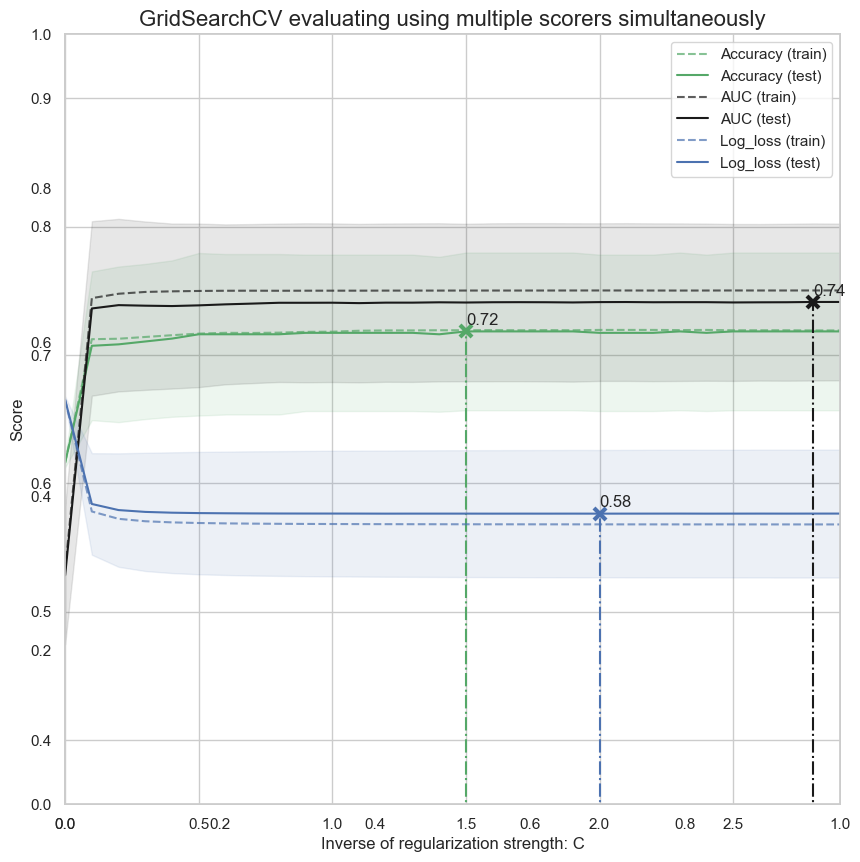

In [65]:
from sklearn.model_selection import GridSearchCV

X = final_train[Selected_features]

param_grid = {'C': np.arange(1e-05, 3, 0.1)}
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

gs = GridSearchCV(LogisticRegression(), return_train_score=True,
                  param_grid=param_grid, scoring=scoring, cv=10, refit='Accuracy')

gs.fit(X, y)
results = gs.cv_results_

print('='*20)
print("best params: " + str(gs.best_estimator_))
print("best params: " + str(gs.best_params_))
print('best score:', gs.best_score_)
print('='*20)

plt.figure(figsize=(10, 10))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",fontsize=16)

plt.xlabel("Inverse of regularization strength: C")
plt.ylabel("Score")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, param_grid['C'].max()) 
ax.set_ylim(0.35, 0.95)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_C'].data, dtype=float)

for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']): 
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = -results['mean_%s_%s' % (sample, scorer)] if scoring[scorer]=='neg_log_loss' else results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = -results['mean_test_%s' % scorer][best_index] if scoring[scorer]=='neg_log_loss' else results['mean_test_%s' % scorer][best_index]
        
    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()

best params: Pipeline(steps=[('scale', StandardScaler(with_mean=False, with_std=False)),
                ('clf', LogisticRegression(C=2.7000100000000002))])
best params: {'clf__C': 2.7000100000000002}
best score: 0.7104350009415604


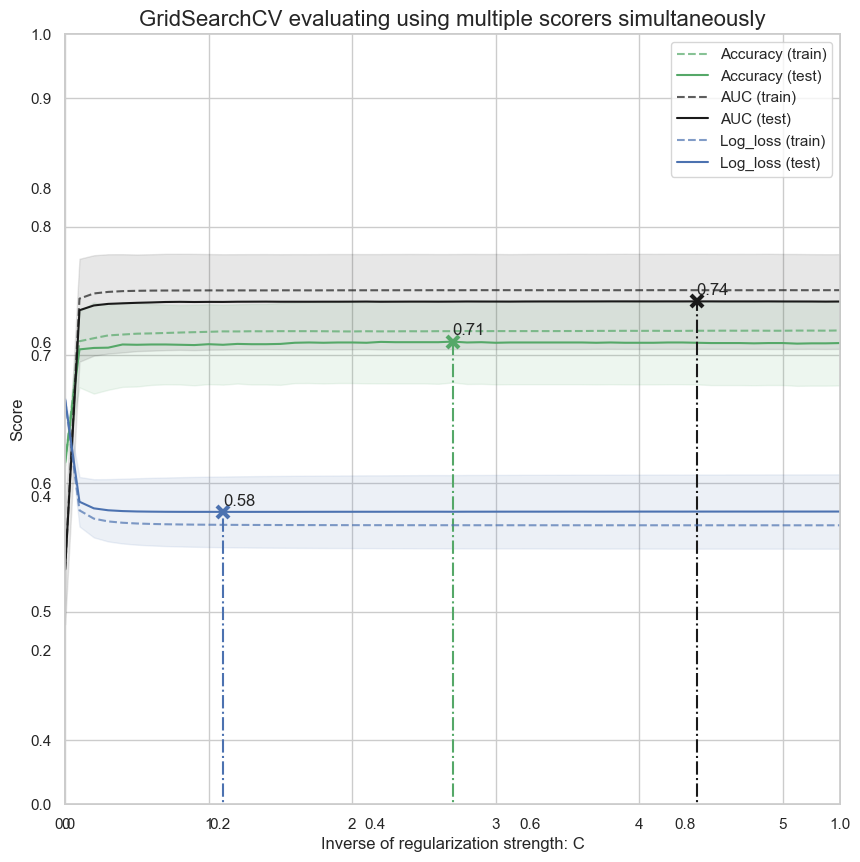

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

#Define simple model
###############################################################################
C = np.arange(1e-05, 5.5, 0.1)
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}
log_reg = LogisticRegression()

#Simple pre-processing estimators
###############################################################################
std_scale = StandardScaler(with_mean=False, with_std=False)
#std_scale = StandardScaler()

#Defining the CV method: Using the Repeated Stratified K Fold
###############################################################################

n_folds=5
n_repeats=5

rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=2)

#Creating simple pipeline and defining the gridsearch
###############################################################################

log_clf_pipe = Pipeline(steps=[('scale',std_scale), ('clf',log_reg)])

log_clf = GridSearchCV(estimator=log_clf_pipe, cv=rskfold,
              scoring=scoring, return_train_score=True,
              param_grid=dict(clf__C=C), refit='Accuracy')

log_clf.fit(X, y)
results = log_clf.cv_results_

print('='*20)
print("best params: " + str(log_clf.best_estimator_))
print("best params: " + str(log_clf.best_params_))
print('best score:', log_clf.best_score_)
print('='*20)

plt.figure(figsize=(10, 10))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",fontsize=16)

plt.xlabel("Inverse of regularization strength: C")
plt.ylabel("Score")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, C.max()) 
ax.set_ylim(0.35, 0.95)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_clf__C'].data, dtype=float)

for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']): 
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = -results['mean_%s_%s' % (sample, scorer)] if scoring[scorer]=='neg_log_loss' else results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = -results['mean_test_%s' % scorer][best_index] if scoring[scorer]=='neg_log_loss' else results['mean_test_%s' % scorer][best_index]
        
    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()